In [1]:
"""Выборочные статистики"""
mean = 0
variance = 0.5
n = 50
def sampleSum(data):
    mem = 0
    for line in data:
        for elem in line:
            mem += elem
    return mem
def sampleUnbiasedSum(data):
    mem = 0
    samSum = sampleMean(data) 
    for line in data:
        for elem in line:
            mem += (elem - samSum)**2
    return mem
def unbiasedSum(data, a):
    mem = 0
    for line in data:
        for elem in line:
            mem += (elem - a)**2
    return mem
def sampleMean(data):
    mem = 0
    for line in data:
        for elem in line:
            mem += elem
    mem = mem/n
    return mem
def sampleVariance(data):
    mem = 0
    samSum = sampleMean(data)
    for line in data:
        for elem in line:
            mem += (elem - samSum)**2
    return mem/n
def sampleUnbiasedVariance(data, a):
    mem = 0
    for line in data:
        for elem in line:
            mem += (elem - a)**2
    return mem/n
def UnbiasedVariance(data):
    mem = 0
    samSum = sampleMean(data)
    for line in data:
        for elem in line:
            mem += (elem - samSum)**2
    return mem/(n-1)
    
f = open('data1.txt', 'r')
data = [line.strip() for line in f]
f.close()
data = [line.split(' ') for line in data]
for i in range(len(data)):
    for j in range(len(data[0])):
        data[i][j] = float(data[i][j])
#sampleVariance(data)
#Выборочное сумма
print("Выборочное сумма")
print(sampleSum(data))
#Выборочное несмещённая сумма
print("Выборочное несмещённая сумма")
print(sampleUnbiasedSum(data))
#Исправленное выборочное среднее
print("Исправленное выборочное среднее")
print(unbiasedSum(data, mean))
#Выборочное среднее
print("Выборочное среднее")
print(sampleMean(data))
#Выборочная дисперсия
print("Выборочная дисперсия")
print(sampleVariance(data))
#Выборочная исправленая дисперсия
print("Выборочная исправленая дисперсия")
print(sampleUnbiasedVariance(data, mean))
#Несмещённая выборочная дисперсия
print("Несмещённая выборочная дисперсия")
print(UnbiasedVariance(data))

Выборочное сумма
1.56
Выборочное несмещённая сумма
32.724056000000004
Исправленное выборочное среднее
32.772728
Выборочное среднее
0.031200000000000002
Выборочная дисперсия
0.6544811200000001
Выборочная исправленая дисперсия
0.65545456
Несмещённая выборочная дисперсия
0.6678378775510205


In [2]:
"""Поиск среднего при известной дисперсии"""
"""Используем нормальное распределения"""
from scipy.stats import norm
import math
epsilon = 0.09
X = sampleMean(data)
"""Судя по таблице, q равен примерно 1.7"""
q = norm.ppf(1-(epsilon/2))
print("Дисперсия =",math.sqrt(variance))
leftBoard = X - (q*math.sqrt(variance))/math.sqrt(n)
rightBoard = X + (q*math.sqrt(variance))/math.sqrt(n)
print("1-eps/2 = ", 1-(epsilon/2))
print("q =", q)
print("Доверительный интервал:")
print("(",leftBoard, ";",rightBoard, ")")

Дисперсия = 0.7071067811865476
1-eps/2 =  0.955
q = 1.6953977102721358
Доверительный интервал:
( -0.13833977102721357 ; 0.20073977102721358 )


In [3]:
"""Поиск среднего при неизвестной дисперсии"""
"""Используем распределение Стьюден"""
from scipy.stats import t
q = t.ppf(0.955, 49)
X = sampleMean(data)
S = math.sqrt(sampleVariance(data))
leftBoard = X - (q*S/math.sqrt(n-1))
rightBoard = X + (q*S/math.sqrt(n-1))
print("1-eps/2 = ", 1-(epsilon/2))
print("q =", q)
print("(",leftBoard, ";",rightBoard, ")")

1-eps/2 =  0.955
q = 1.7295851210495496
( -0.16869064160069447 ; 0.23109064160069448 )


In [4]:
"""Поиск диспресии при известном среднем"""
"""Используем распределение Хи-квадрат"""
from scipy.stats import chi2
X = unbiasedSum(data, mean)
q1 = chi2.ppf(0.045, 50)
q2= chi2.ppf(0.955, 50)
print("q1 =", q1, "q2 =", q2)
leftBoard = X/q2
rightBoard = X/q1
print("1-eps/2 = ", 1-(epsilon/2), "eps/2 = ", epsilon/2)
print("(",leftBoard, ";",rightBoard, ")")

q1 = 34.370151122380726 q2 = 68.12321140321637
1-eps/2 =  0.955 eps/2 =  0.045
( 0.48108019755587544 ; 0.9535229531958463 )


In [5]:
"""Поиск дисперсии при неизвестном среднем"""
"""Используем теорему Фишера для нормальной выборки"""
q1 = chi2.ppf(0.045, 49)
q2= chi2.ppf(0.955, 49)
print("q1 =", q1, "q2 =", q2)
S = math.sqrt(sampleVariance(data))
leftBoard = n*S/q2
rightBoard = n*S/q1
print("(",leftBoard, ";",rightBoard, ")")

q1 = 33.54126755309221 q2 = 66.95197462660973
( 0.6041644616737714 ; 1.2059771934454673 )


In [6]:
f = open('data2.txt', 'r')
data = [line.strip() for line in f]
f.close()
data = [line.split(' ') for line in data]
for i in range(len(data)):
    for j in range(len(data[0])):
        data[i][j] = float(data[i][j])
n = len(data)*len(data[0])

In [7]:
import numpy as np
#sections = np.zeros((1,10))
sections = [[] for i in range(10)]
for line in data:
    for elem in line:
        for i in range(1,11):
            if elem > i/10:
                continue
            else:
                sections[i-1].append(elem)
                break
empiricalSec = [0 for i in range(len(sections))]
empiricalSec[0] = len(sections[0])
for i in range(1, len(sections)):
    empiricalSec[i] = empiricalSec[i-1]+len(sections[i])
histogram = [0 for i in range(len(sections))]
for i in range(len(sections)):
    histogram[i] = len(sections[i])
empiric = [elem for line in data for elem in line]
empiric.sort()

def U01(t):
    return t

argsup = 0.794 sup = 0.1273333333333334 Fn = 0.6666666666666666
K(q) = 0.91 q = 1.2451910767331245 sqrt(n) * Dn =  0.697433389889912
0.697433389889912 < 1.2451910767331245 => Гипотеза H0 принимается


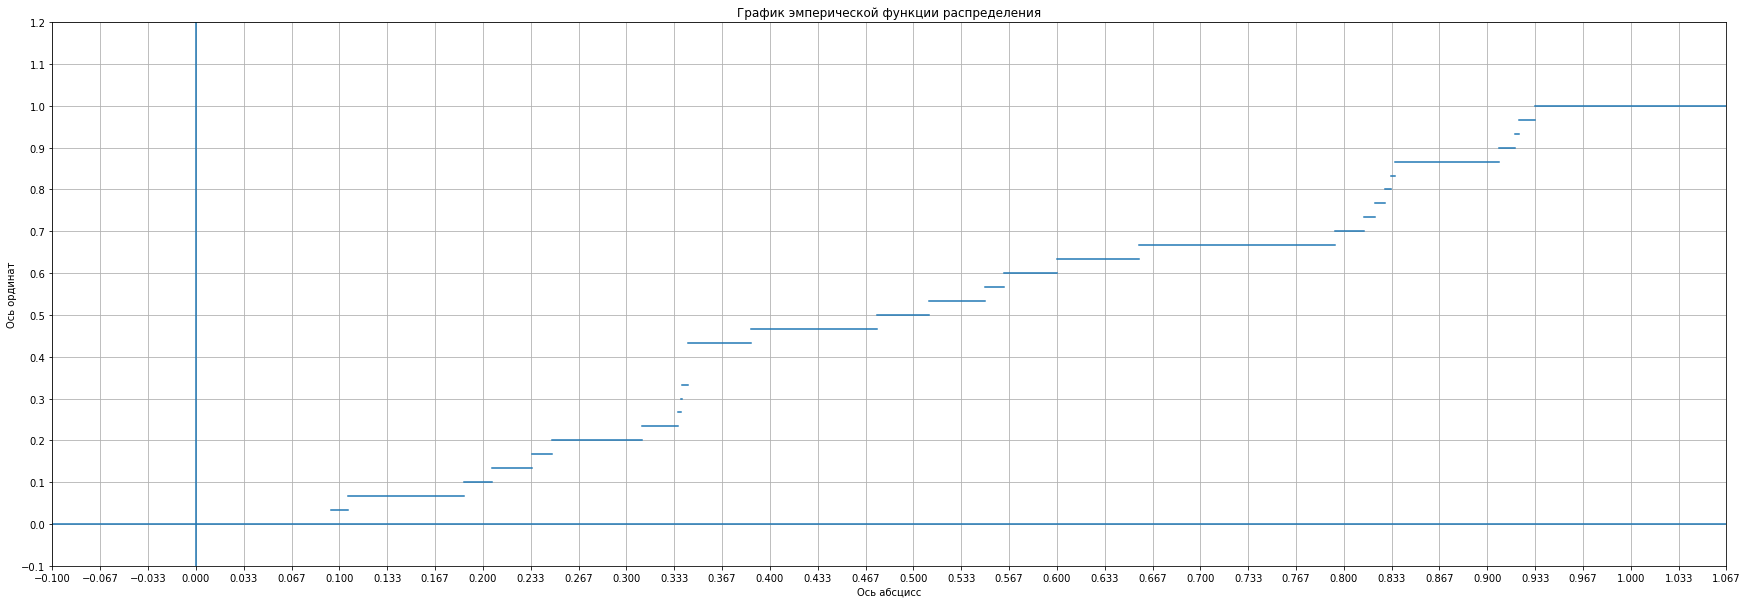

In [15]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from matplotlib.lines import Line2D
import math
from scipy.stats import kstwobign

x = [empiric[i] for i in range(30)]

y = [(i+1)/n for i in range(len(x))]

#Ищем супремум разности по краям "ступеней"
sup = 0
argsup = 0
Fn = 0
for i in range(29):
    mem1 = math.fabs(y[i]-U01(x[i]))
    mem2 = math.fabs(y[i]-U01(x[i+1]))
    if (mem1 > mem2) and (mem1 > sup):
        sup = mem1
        Fn = y[i]
        argsup = x[i]
    if (mem2 > mem1) and (mem2 > sup):
        sup = mem2
        argsup = x[i+1]
        Fn = y[i]
print("argsup =", argsup, "sup =", sup, "Fn =", Fn)

#Значения K(q) = 1-eps и q
K = 1-epsilon
q = kstwobign.ppf(0.91)
print("K(q) =", K, "q =", q, "sqrt(n) * Dn = ", sup*math.sqrt(30))
print(math.sqrt(n) * sup, "<", q, "=> Гипотеза H0 принимается")


xticks = 1/30
yticks = 1/10
xx = [-1/10 + i*xticks for i in range(36)]
yy = [-1/10 + i*yticks for i in range(14)]


fig = plt.figure(figsize = (30,10))
ax = fig.add_subplot(111)

ax.set_xticks(xx)
ax.set_yticks(yy)

#Оси координат
l1 = Line2D([-2, 2], [0, 0])
l2 = Line2D([0, 0], [-2, 2])
ax.add_line(l1)
ax.add_line(l2)

#Продление графика на бесконечность
#l2 = Line2D([1, 2], [1, 1])
#ax.add_line(l2)

for i in range(29):
    #l1 = Line2D([x[i], x[i]], [0, y[i]])
    l2 = Line2D([x[i], x[i+1]], [y[i], y[i]])
    #l3 = Line2D([x[i+1], x[i+1]], [y[i], 0])
    #ax.add_line(l1)
    ax.add_line(l2)
    #ax.add_line(l3)
    
#l1 = Line2D([x[29], x[29]], [0, 1])
l2 = Line2D([x[29], 2], [1, 1])
#ax.add_line(l1)
ax.add_line(l2)


#l1 = Line2D([0, 1], [0, 1])
#ax.add_line(l1)
#ax.add_line(Line2D([0,1], [0,0]))
#ax.plot(x, y, 'b')
#ax.scatter(c1,c1Values, color = 'red')
#ax.scatter(c2,c2Values, color = 'red')
ax.grid(True)

# В отличие от интерфейса pyplot, команды для назначения подписей 
# нужно употреблять с приставкой set_

ax.set_title(u'График эмперической функции распределения')
ax.set_xlabel(u'Ось абсцисс')
ax.set_ylabel(u'Ось ординат')

plt.show()

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
[0.03333333333333333, 0.06666666666666667, 0.1, 0.26666666666666666, 0.03333333333333333, 0.13333333333333333, 0.03333333333333333, 0.03333333333333333, 0.16666666666666666, 0.13333333333333333]


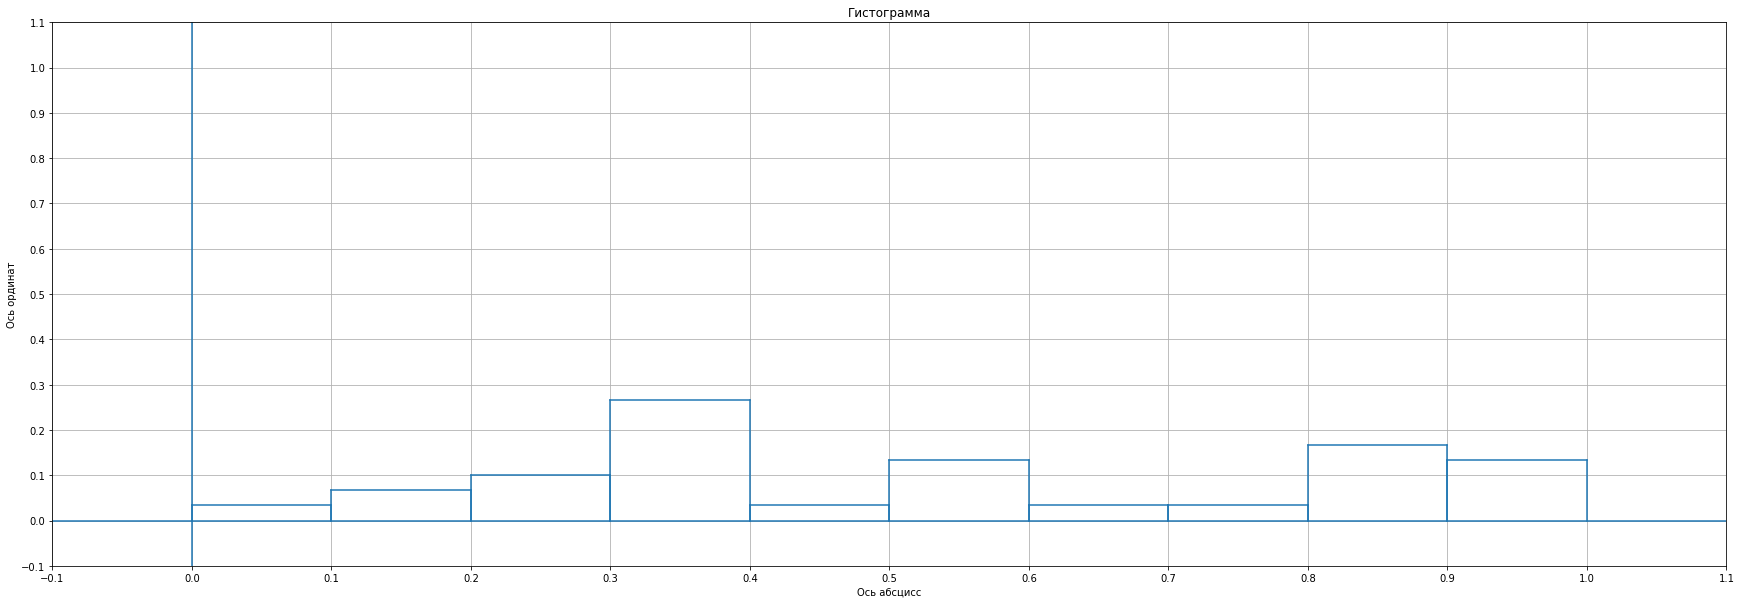

In [9]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from matplotlib.lines import Line2D


x = [i/10 for i in range(11)]
print(x)

y = [histogram[i]/n for i in range(len(x)-1)]
print(y)

xticks = 1/10
yticks = 1/10
xx = [-1/10 + i*xticks for i in range(13)]
yy = [-1/10 + i*yticks for i in range(13)]


fig = plt.figure(figsize = (30,10))
ax = fig.add_subplot(111)

ax.set_xticks(xx)
ax.set_yticks(yy)

#Оси координат
l1 = Line2D([-2, 2], [0, 0])
l2 = Line2D([0, 0], [-2, 2])
ax.add_line(l1)
ax.add_line(l2)

#Продление графика на бесконечность
#l2 = Line2D([1, 2], [1, 1])
#ax.add_line(l2)

for i in range(10):
    l1 = Line2D([x[i], x[i]], [0, y[i]])
    l2 = Line2D([x[i], x[i+1]], [y[i], y[i]])
    l3 = Line2D([x[i+1], x[i+1]], [y[i], 0])
    ax.add_line(l1)
    ax.add_line(l2)
    ax.add_line(l3)

    
#ax.add_line(Line2D([0,1], [0,0]))
#ax.plot(x, y, 'b')
#ax.scatter(c1,c1Values, color = 'red')
#ax.scatter(c2,c2Values, color = 'red')
ax.grid(True)

# В отличие от интерфейса pyplot, команды для назначения подписей 
# нужно употреблять с приставкой set_

ax.set_title(u'Гистограмма')
ax.set_xlabel(u'Ось абсцисс')
ax.set_ylabel(u'Ось ординат')

plt.show()

In [10]:
# Для критерия Пирсона хи-квадрат для выборки т=30 берём 4-5 интервалов
# Пусть k = 4, epsilon = 0.09
from scipy.stats import chi2
k = 4
n = 30
delta = [i/(k) for i in range(k+1)]
p = [delta[i+1] - delta[i] for i in range(k)]
v = [0 for i in range(k)]
for line in data:
    for elem in line:
        for i in range(k):
            if elem > (i+1)/k:
                continue
            else:
                v[i] += 1
                break
print(v, p, delta)

mem = 0
for i in range(k):
    mem += ((v[i] - n*p[i])**2)/(n*p[i])
print(mem)
hi = 1-0.09
q = chi2.ppf(hi, k-1)
print(mem, "<", q, "=> H0 принимается")

[6, 9, 5, 10] [0.25, 0.25, 0.25, 0.25] [0.0, 0.25, 0.5, 0.75, 1.0]
2.2666666666666666
2.2666666666666666 < 6.491457715844935 => H0 принимается


In [2]:
import numpy as np
import math
"Статистики для третьего задания"
"Выборочная статистика для первых 20 значений"
def sampleMean(data, count):
    mem = 0
    for line in data:
        for elem in line:
            mem += elem
    return mem/count
def unbiasedVariance(data, count):
    mem = 0.0
    samSum = sampleMean(data, count)
    for line in data:
        for elem in line:
            mem += (elem - samSum)**2
    return mem/count

f = open('data1.txt', 'r')
data = [line.strip() for line in f]
f.close()
data1 = np.zeros((2,10))
data2 = np.zeros((3,10))
data = [line.split(' ') for line in data]
for i in range(5):
    for j in range(10):
        if (i < 2):
            data1[i][j] = float(data[i][j])
        else:
            data2[i-2][j] = float(data[i][j])


In [6]:
"""Критерий Стюдента"""
"""Проверка гипотезы о совпадении средних"""
from scipy.stats import t
X = sampleMean(data1, 20)
Y = sampleMean(data2, 30)
Sx = unbiasedVariance(data1, 20)
Sy = unbiasedVariance(data2, 30)
print(X)
print(Y)
print(Sx)
print(Sy)
psi = (X-Y)/((math.sqrt(1.0/20.0+1.0/30.0)*(math.sqrt((20*Sx**2+30*Sy**2)/48))))
epsilon = 0.09
T = epsilon/2
print(psi)
q = t.ppf(0.91, 48)
print(-q, "<", psi, "<", q, "=> H0 принимается")


-0.018250000000000016
0.06416666666666668
0.7360219874999999
0.5974035388888889
-0.42617734870236507
-1.8532412099854623 < -0.42617734870236507 < 1.8532412099854623 => H0 принимается


In [13]:
"""Критерий Фишера"""
"""Проверка гипотезы о совпадении дисперсий"""
from scipy.stats import norm
F1 = epsilon/2
F2 = 1-epsilon/2
ksi = (20*29*Sx)/(30*19*Sy)
q2, q1 = f.ppf([0.955, 0.045], 19, 29)
print("q1 < ksi < q2")
print(q1, "<", ksi, "<", q2, "=> H0 принимается")

[ 2.17009038 -1.69539771]
q1 < ksi < q2
0.47042313500498445 < 1.2536495102461431 < 1.999546326111434 => H0 принимается
